In [1]:
%load_ext autoreload
%autoreload 2

# Latex Config
$\newcommand{\mat}[1]{\left[\begin{array}#1\end{array}\right]}
\newcommand{\vx}{{\mathbf x}}
\newcommand{\hx}{\hat{\mathbf x}}
\newcommand{\vbt}{{\mathbf\beta}}
\newcommand{\vy}{{\mathbf y}}
\newcommand{\vz}{{\mathbf z}}
\newcommand{\vb}{{\mathbf b}}
\newcommand{\vu}{{\mathbf u}}
\newcommand{\vv}{{\mathbf v}}
\newcommand{\vw}{{\mathbf w}}
\newcommand{\va}{{\mathbf a}}
\newcommand{\vp}{{\mathbf p}}
\newcommand{\col}{{\operatorname{Col}}}
\newcommand{\nul}{{\operatorname{Nul}}}
\newcommand{\rank}{{\operatorname{rank}}}
\newcommand{\setb}{{\mathcal{B}}}$

$\newcommand{\bm}[1]{\mathbf{#1}}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\argmax}{\operatornamewithlimits{argmax}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\Var}{\mathop{\mathrm{Var}}\nolimits}
\newcommand{\Covar}{\mathop{\mathrm{Covar}}\nolimits}
\newcommand{\E}{\mathop{\mathrm{E}}\nolimits}
\newcommand{\dx}{\mathrm{d}x}
\newcommand{\C}{\mathbb{C}}
\newcommand{\im}{\textrm{im}}
\newcommand{\rref}{\texttt{rref}}$

$\newcommand{\der[1]}{\dfrac{d}{dx}\left[#1\right]}
\newcommand{\ve[1]}{\mathbf{\overrightarrow{#1}}}$
$\newcommand{\proj}{\textrm{proj}}
\newcommand{\spn}{\textrm{Span}}
\newcommand{\refl}{\textrm{ref}}$


$\newcommand{\pder}[2][]{\frac{\partial#1}{\partial#2}}$

In [2]:
from lecture_utils import *

In [3]:
import sys 
import binascii
import os

# Jupyter notebook specific 
from ipywidgets import interactive, fixed, IntSlider, HTML, HTMLMath, FloatSlider,HBox, Button
from IPython.display import Image
#from IPython.core.display import HTML 
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex


import numpy as np                # arrays and functions which operate on array
import matplotlib.pyplot as plt   # normal plotting
import seaborn as sns             # Fancy plotting 
import pandas as pd               # Data input and manipulation
import scipy
from scipy.stats import norm

from collections import Counter
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.datasets
from sklearn.datasets.samples_generator import make_circles
from sklearn.datasets import make_classification,load_breast_cancer
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, f1_score
from sklearn.neural_network import MLPClassifier


import matplotlib
from jupyterthemes import jtplot
from bqplot import *
from mpl_toolkits.mplot3d import Axes3D


from sklearn.linear_model import LogisticRegression
# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()
# You do not need any more imports 
%matplotlib inline

/usr/local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
%%html
<style>
 .container.slides .celltoolbar, .container.slides .hide-in-slideshow {
    display: None ! important;
}
</style>

In [5]:
# source https://github.com/damianavila/RISE/issues/32


def hide_code_in_slideshow():
    uid = binascii.hexlify(os.urandom(8)).decode()
    html = """<div id="%s"></div>
    <script type="text/javascript">
        $(function(){
            var p = $("#%s");
            if (p.length==0) return;

            while (!p.hasClass("cell")) {
                p=p.parent();

                if (p.prop("tagName") =="body") return;
            }
            var cell = p;
            cell.find(".input").addClass("hide-in-slideshow")
        });
    </script>""" % (uid, uid)
    display_html(html, raw=True)

In [6]:
%%javascript
Jupyter.notebook.config.update({"load_extensions":{"calico-spell-check":true,
                                                  "calico-document-tools":true,
                                                  "calico-cell-tools":true}})


<IPython.core.display.Javascript object>

In [7]:
#%%javascript
#document.body.classList.add('theme-dark')

# The Geometry of  Machine Learning  
- @Author: Kai Bernardini
    - Security Consultant  <br>
    - Repo: https://github.com/kaidb
    - Email: kaidb@bu.edu

# Agenda: 
- Classification: a Geometric perspective 
- Maximum Likelihood Estimation 
- Simple Cost functions and optimization 
- Geometry of Non-Linear methods
    - focusing on how to turn a Linear method into a non-linear method vida feature maps)
- Logistic Regression and its Generalizations
- Real world Example: Wisconsin Breast Cancer Dataset   

# Refresher: What is Machine Learning?
- Short Answer: 
    - It is  Applied Statistics
- Slightly longer Answer:
    - Informally, Machine Learning  attempts to get computers to perform a task without being explicitly programmed to do so.

## Example: 
- AlphaGo Defeating a Go master without having a specific rule for every configuration
- Building a model to predict the price of a stock based on historical informaiton 

## Non-Example: 
- Writing a Tic-Tac-Toe AI that has a rule for every board configuration
- Rule Based chatbot 

# Synthetic Example
- Lets consider a simplified problem where the goal is to determine whether or not a patient's tumor is benign or malignant
- Suppose further that each patient can be represented by 2 real numbers 
- lets plot the points in $\mathbb{R}^2$ and assign a color to each class 
- Blue for malignant tumors, red for benign tumors 

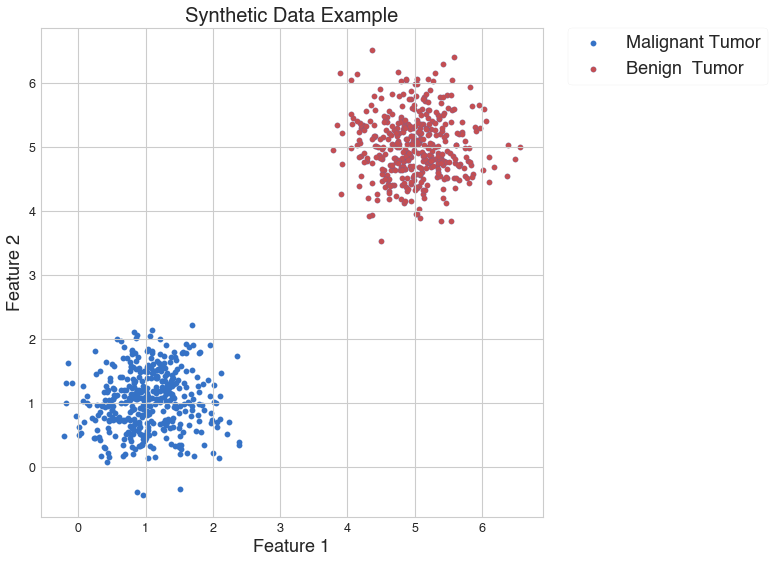

In [8]:
hide_code_in_slideshow()
toy_data = synthetic_example(sigma=.5)

# Classifying New Points 
- If we could separate the red dots from the blue dots, we could predict the class of points we haven't seen before


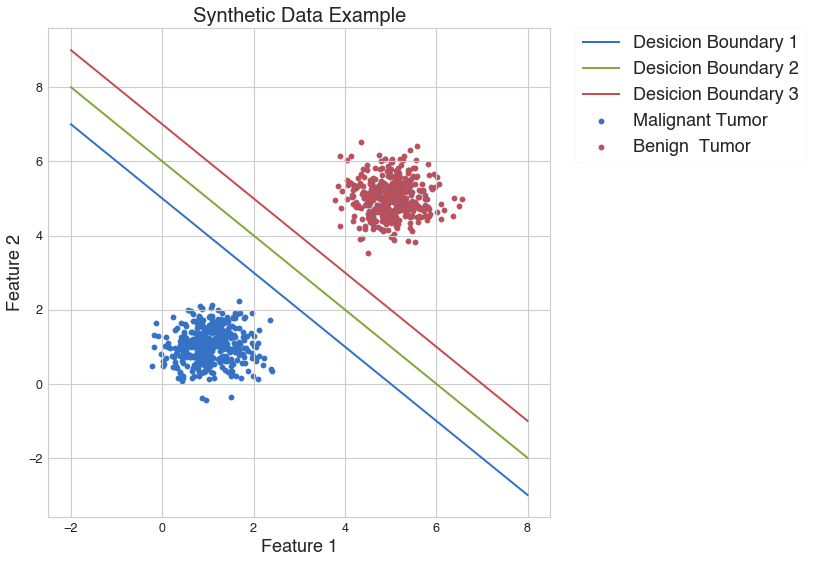

In [9]:
hide_code_in_slideshow()
toy_data = synthetic_example(sigma=.5, c_boundary= True)

## How to find the "best" Decision boundary?
- Well, What do you mean by "best"?
- There are many notions of "best" 
- Lets consider something easier first 

# Flipping coins
- Suppose you  observe the outcome of 100 coin flips
- You view 50 heads and 50 tails. 
- What wold be the "best" estimate for the probability of heads?
    - Again, what is meant by best?

# Bernoulli Parameter Estimation 
- Lets give these outcomes names. Let $X_1,\ldots X_{n}$ be Bernoulli Random Variables with $$Pr(X_i=k) = p^{k_i}(1-p)^{1-k_i}$$ for $k_i\in \{0,1\}$
- Then the probability of observing a particular string of outcomes **given** the parameter $p$ is exactly $$Pr(X_1, X_2, \ldots X_{n}) = \prod_{i=1}^{n} Pr(X_i) = \prod_{i=1}^{n} p^{X_i} (1-p)^{1-X_{i}} $$
    - Note that 
        - if $X_i=1 \implies p^{X_i}=p$ and $(1-p)^{1-X_i} =1$ 
        - and   $X_i=0 \implies p^{X_i}=1$ and $(1-p)^{1-X_i} =1-p$
- Lets say we fix $p=.1$ and we observed 50 heads and 50 tails, then the likelihood is $$(.9^{50}) (.1^{50})$$

# But what is the right way to pick $p$?
- One reasonable choice for $p$ is to select whatever value makes the likelihood **largest!** That is, we are looking for the $p$ that maximizes the likelihood
$$ \max_{p} \prod_{i=1}^{n} p^{X_i} (1-p)^{1-X_{i}}$$
- As a computational concern, it is easier to maximize the **log-likelihood** as the logarithm function takes products to sums.
    - $\log$ is a monotonic increasing function, so this does not affect the optimization 
Hence, 
 
$$p= \max_{p} \log \big(\prod_{i=1}^{n} p^{X_i} (1-p)^{1-X_{i}} \Big) = \max_p \sum_{i=1}^{n} X_i\log(p) + (1-X_i) \log(1- p)  $$

# Maximum Likelihood Estimation
- In the case for $n =100$ with 50 heads observed, it turns out that $p=\frac{50}{100}$ will maximize the **likelihood** of the observed outcomes
- In general, let $H$ be the number of heads we observe and $T$ the number of tails we observe. 
    - Then the estimate for $p$ that **maximizes the likelihood** will be $\frac{H}{T+H}$
- Proof Outline...
    - The proof is a good exercise. Differentiate  the log-likelihood function with respect to p and set it equal to zero.
    - Solve for p in terms of the number of heads, and number of tails

In [10]:
hide_code_in_slideshow()
    
xs =  LinearScale()
ys = LinearScale()
x = np.arange(.01, 1,.01)

y = cost_values(50, 50, x)


line = Lines(x=x, y=y, scales={'x': xs, 'y': ys}, colors=['red'],)
xax = Axis(scale=xs, label='probability of heads')
yax = Axis(scale=ys, orientation='vertical', tick_format='0.2f', label='Likelihood', )

fig = Figure(marks=[line], axes=[xax, yax], animation_duration=1000,title="Likelihood" )
display(fig)



style = {'description_width': '100'}
heads_slider = IntSlider( max=1000, min=0,value=100, description='Heads:',readout=True,
    readout_format='d', style = style)
tails_slider = IntSlider(max=1000, min=0,value=100, description=' Tails:',readout=True,
    readout_format='d',style = style)


def update_dist(change):
    line.y= cost_values(heads_slider.value,tails_slider.value, x)
    


heads_slider.observe(update_dist, 'value')
tails_slider.observe(update_dist, 'value')
text_display = HTML( "Heads Count={} <br /> Tails Count={} <br />  Maximum Likelihood Estimate={} <br />".format(heads_slider.value, tails_slider.value, 
                                                                                                 heads_slider.value/ (heads_slider.value + tails_slider.value)) )
def update_html(change):
    text_display.value = "Heads Count={} <br />  Tails Count={} <br />  Maximum Likelihood Estimate={} <br />".format(heads_slider.value, tails_slider.value, 
                                                                                                 heads_slider.value/ (heads_slider.value + tails_slider.value)) 

heads_slider.observe(update_html, 'value')
tails_slider.observe(update_html, 'value')
display(heads_slider, tails_slider)
text_display

Figure(animation_duration=1000, axes=[Axis(label='probability of heads', scale=LinearScale()), Axis(label='Lik…

IntSlider(value=100, description='Heads:', max=1000, style=SliderStyle(description_width='100'))

IntSlider(value=100, description=' Tails:', max=1000, style=SliderStyle(description_width='100'))

HTML(value='Heads Count=100 <br /> Tails Count=100 <br />  Maximum Likelihood Estimate=0.5 <br />')

# Introduction To Logistic Regression
## At a Glance 
- For now, we assume that the target variable $Y$ (the outcome) has only two values, 0 or 1.  (i.e., for our example, a patient either  has  cancer  or does not. )
- We also assume 
$$P(\ y=1 \; \vert \; x \ ; \ b,w \ ) = h_{w,b}(x)$$ 
$$P(\ y=0 \; \vert \; x \ ; \ b,w \ ) = 1 - h_{b,w}(x)$$
- for  $\theta = [b,w]^T$ , $b\in \mathbb{R}$ and $w\in \mathbb{R}^p$, call it $h_{b,w}(x)$


## Maximum Likelihood  Logistic Regression 
- As with the coin flips, we wish to maximize the likelihood of observations $ \{ (x^{(i)}, y^{(i)}) \}_{i=1}^n$ under the assumption that 
- 
$$P(\ y=1 \; \vert \; x \ ; \ b,w \ ) = h_{w,b}(x)$$ 
$$P(\ y=0 \; \vert \; x \ ; \ b,w \ ) = 1 - h_{b,w}(x)$$

- Continuing as before, we get

$$L(\theta) = \prod_{i=1}^{m}{h_{b,w}(x^i)}^{y^{(i)}}(1-h_{b,w}(x^i))^{1-y^{(i)}}$$

Taking the log of both sides gives

$$\log L(b,w) =\sum_{i=1}^{n} \Big(  \ -y^{(i)} \log(h_{b,w}(x^{(i)})) \ - \ (1 - y^{(i)})\log(1-h_{b,w}(x^{(i)})) \Big)$$
- Note by convention, we minimize the loss function (in this case the negative log likelihood) <br>
    
 Goal is is to find  <br>
 
$$ \hat{b}, \hat{w} = \min_{b,w} L(b,w,X,y) = \min_{b,w}\sum_{i=1}^{n} \Big(   -y^{(i)} \log(h_{b,w}(x^{(i)}))-  (1 - y^{(i)})\log(1-h_{b,w}(x^{(i)})) \Big)$$

# How to Choose $h_{w,b}(\cdot)$?
-  $h$ should take vectors $x\in X$ and map them to the interval $(0,1)$ 
- A common setup is as follow
$h(x) = \sigma( X w + b)$
for $X \in \mathbb{R}^{n \times p }$ ( $n$ examples, $p$ predictors) and $w \in \mathbb{R}^p$

where function $\sigma$ is the sigmoid function. The sigmoid function is defined as:

$$\sigma(z) = \dfrac{1}{1+e^{-z}}$$




# Sigmoid function
This sigmoid function $$\sigma: \mathbb{R}\to (0,1)\subset \mathbb{R}$$ defined by $$x \mapsto \frac{1}{1+e^{-x}}$$ 


A vector extension to this function can be constructed by applying it element wise to a vector. IE, $$\sigma: \mathbb{R}^n \to (0,1)^n \subset \mathbb{R}^n$$ where
$$ \text{for } x \in \mathbb{R}^n \text{,     } \sigma(x) =\sigma \begin{pmatrix}
    x_1  \\
    x_2  \\
    \vdots  \\
    x_n  \\
\end{pmatrix}= \begin{pmatrix}
    \sigma(x_1)  \\
    \sigma(x_2)  \\
    \vdots  \\
    \sigma(x_n)  \\
\end{pmatrix} = \begin{pmatrix}
    \frac{1}{1+e^{-x_1}}  \\
    \frac{1}{1+e^{-x_2}}  \\
    \vdots  \\
    \frac{1}{1+e^{-x_n}}  \\
\end{pmatrix} $$

Text(0.5, 1.0, 'Sigmoid Function')

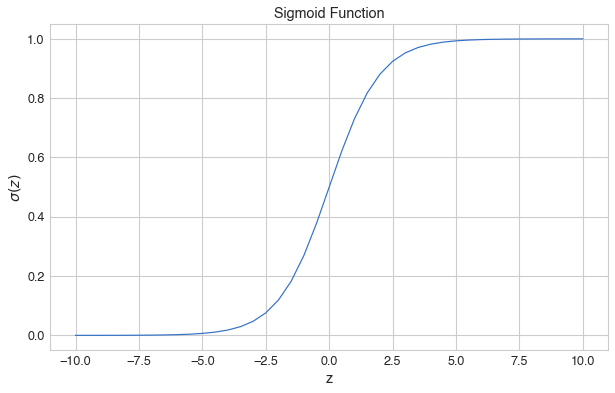

In [11]:
def g(z):
    """Sigmoid function"""
    return 1 / (1 + np.exp(-z))

hide_code_in_slideshow()
plt.figure(figsize=(10,6))
plt.plot(np.arange(-10,10.5,.5) ,g( np.arange(-10,10.5,.5)))
plt.xlabel('z')
plt.ylabel('$\sigma(z)$')
plt.grid(True)
plt.title("Sigmoid Function")

## Logistic Regression Setup
For a single observation
 $$ \log \Big(\frac{Pr(Y_i|x^{(i)},b,w )}{1- Pr(Y_i|x^{(i)},b,w )} \Big) = \log \Big( \frac{h_{b,w} (x^{i})}{1 - h_{b,w} (x^{i})} \Big) $$
- Find $w,b$ that maximize the log likelihood given $\{ (x^{(i)}, y_i) \}_{i=1}^n$
    - Or equivalently minimize the negative log-likelihood 



# Quick Remark On Optimization
- There is no closed form solution, so we must rely on numerical methods. 
- One such method is Gradient Descent
- <b>WARNING: In general, optimization is incredibly difficult. This is a special case where the cost function has some special property called convexity </b>


## Gradient Decent at a glance
- Choose a learning rate $\alpha$ 
- Let $L$ be the loss function defined by the negative log likelihood 
- for $k$ iterations, do the following:
    - $$w \leftarrow w - \alpha (\nabla_w L)$$
    - $$b \leftarrow b - \alpha \Big(\frac{\partial }{\partial b}L \Big)$$
      
## In Practice
- Logistic regression is typically optimized using a variant  Newton's Method 
-  see [Broyden–Fletcher–Goldfarb–Shanno (BFGS)]( https://en.wikipedia.org/wiki/BFGS_method)

In [12]:
toy_data = toy_data.sample(frac=1).reset_index(drop=True)
X, y = toy_data[["Feature1", "Feature2"]].values, toy_data.Target
#make_classification(300, 2, 2, 0, weights=[.5, .5], random_state=15)
clf = LogisticRegression().fit(X[:200], y[:200])
xx, yy = np.mgrid[-10:10:.01, -10:10:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
clf.coef_, clf.intercept_

(array([[1.46251472, 1.45129508]]), array([-8.81583507]))

[None,
 (-5.0, 10.0),
 (-5.0, 10.0),
 Text(0.5, 0, '$X_1$'),
 Text(0, 0.5, '$X_2$')]

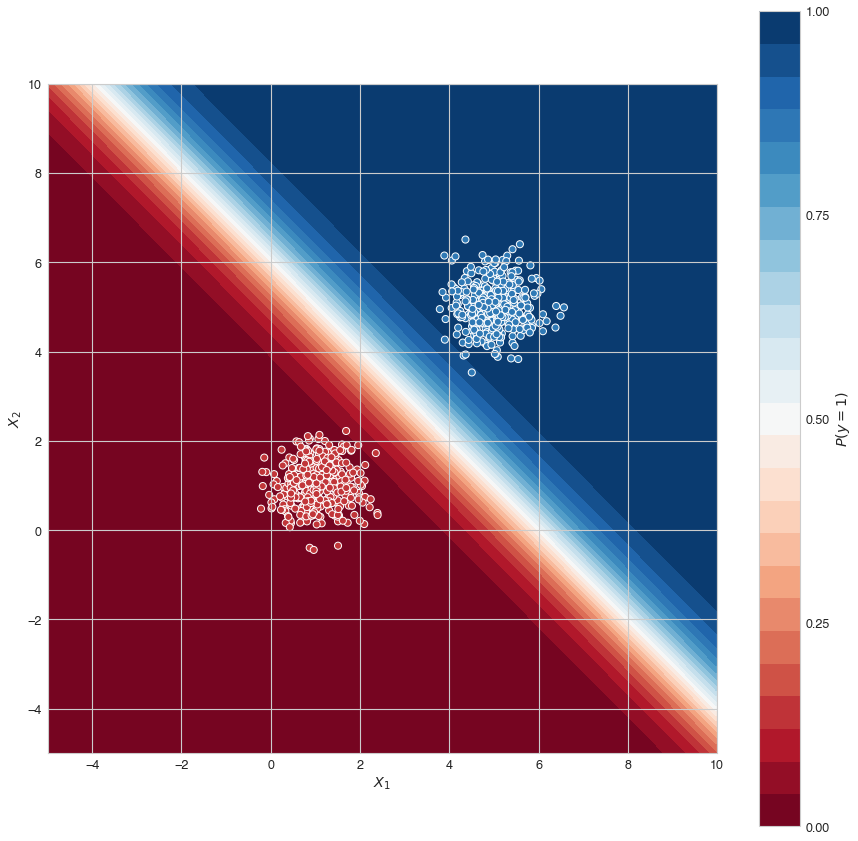

In [13]:
hide_code_in_slideshow()
f , ax = plt.subplots(figsize=(15, 15))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,0], X[:, 1], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 10), ylim=(-5, 10),
       xlabel="$X_1$", ylabel="$X_2$")

[None,
 (-5.0, 10.0),
 (-5.0, 10.0),
 Text(0.5, 0, '$X_1$'),
 Text(0, 0.5, '$X_2$')]

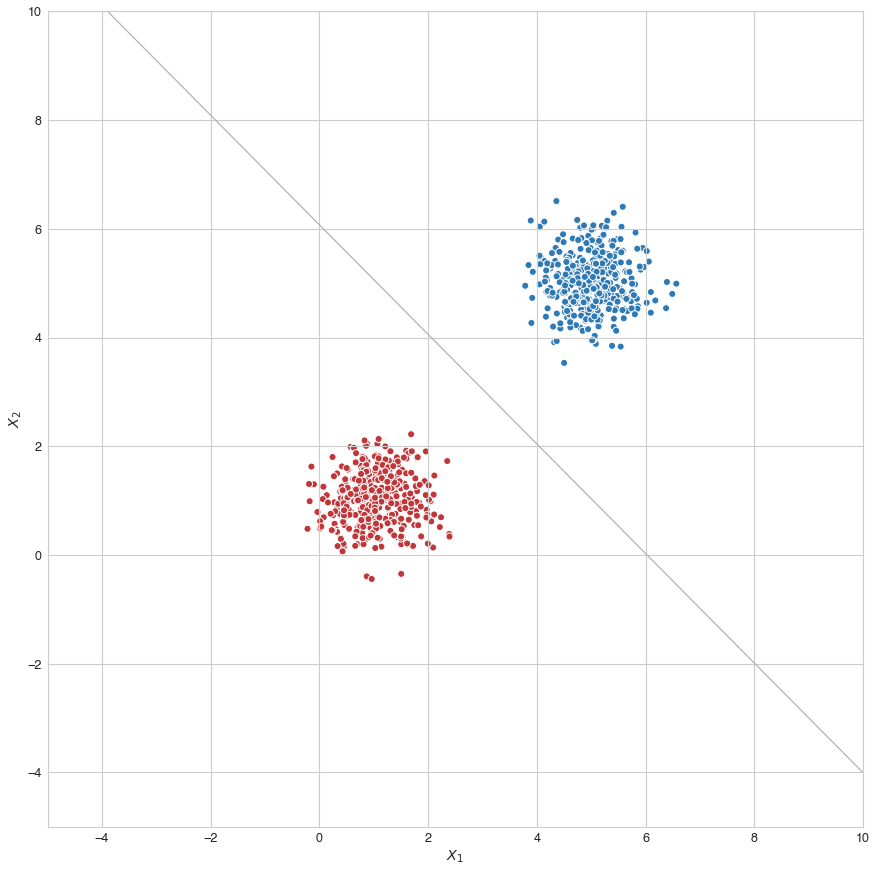

In [14]:
hide_code_in_slideshow()
f, ax = plt.subplots(figsize=(15, 15))
ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=1.2)

ax.scatter(X[:,0], X[:, 1], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 10), ylim=(-5, 10),
       xlabel="$X_1$", ylabel="$X_2$")

Text(0.5, 0, 'Cost')

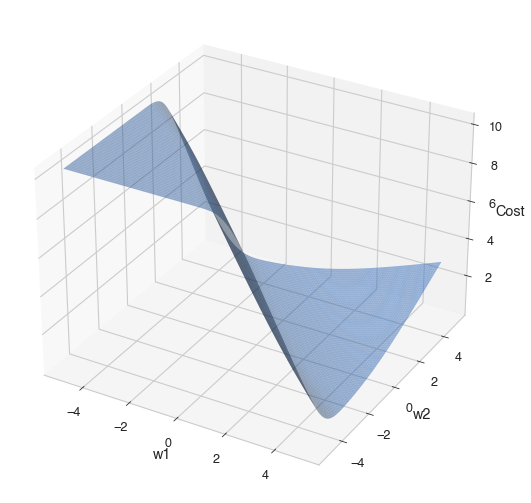

In [15]:
hide_code_in_slideshow()

b = -4.7 # assume we know this somehow 
#ms = np.linspace(-2.0, 2,0, 20)
#bs = np.linspace(-2, 2, 20)
ms = np.arange(-5,5.01,.1) +.053
bs = np.arange(-5,5.01,.1)+.053
M, B = np.meshgrid(ms, bs)

zs = np.array([computeCost(b,np.array([mp, bp]).reshape((2,1)),X,y.values.reshape(-1,1) ) 
               for mp, bp in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)


fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d') 

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.5)

ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('Cost')



<a list of 10 text.Text objects>

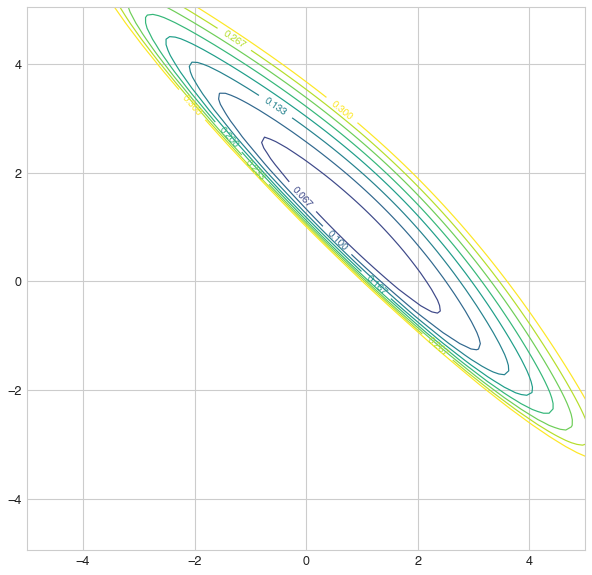

In [16]:
hide_code_in_slideshow()
plt.figure(figsize=(10,10))
plt.xlim(-5,5)
CT = plt.contour(M,B,Z, np.linspace(0,.3,10))
plt.clabel(CT, inline=1, fontsize=10, )

In [17]:
hide_code_in_slideshow()
plot3D(M,B, Z)

/usr/local/lib/python3.8/site-packages/IPython/core/display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [18]:
hide_code_in_slideshow()
plot3D(M,B,-1 * Z)

# Limitations 
- Logistic regression can only encode linear decision boundaries in the feature space
- Therefore, if the data is not linearly separable, the model will fail!

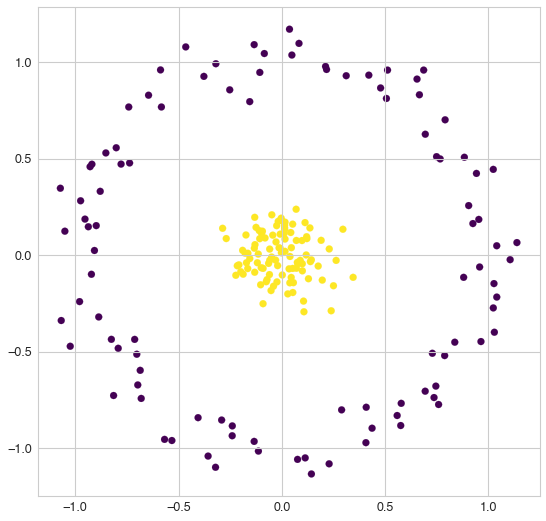

In [19]:
hide_code_in_slideshow()
plt.figure(figsize=(9,9))
X, y = make_circles(200, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, )

[None, (-2.0, 2.0), (-2.0, 2.0), Text(0.5, 0, '$X_1$'), Text(0, 0.5, '$X_2$')]

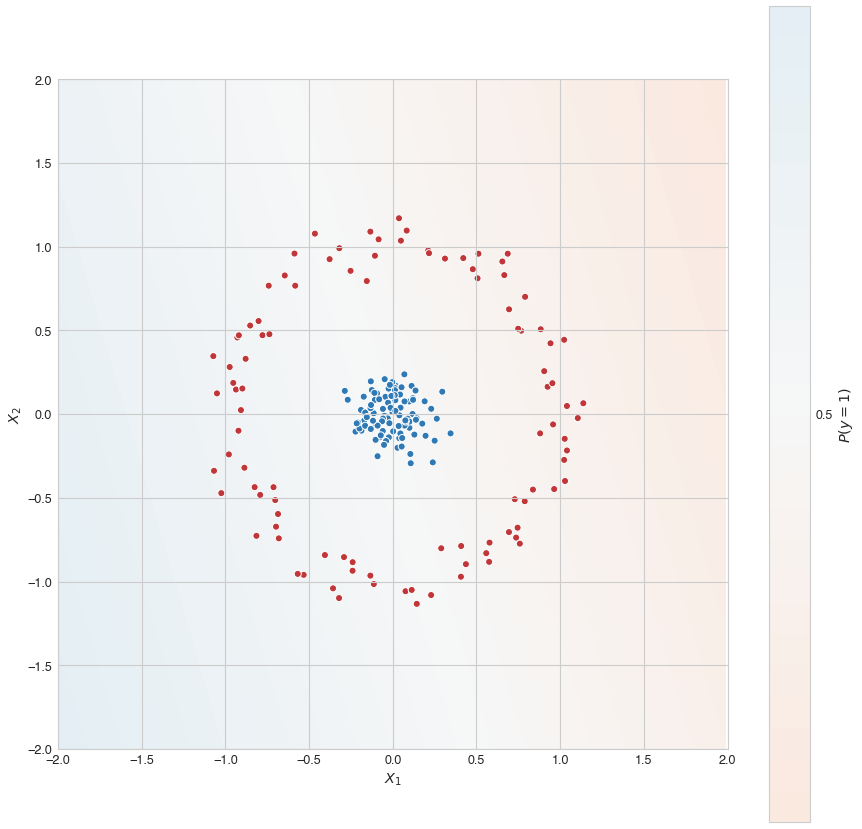

In [20]:
hide_code_in_slideshow()
clf = LogisticRegression().fit(X, y)
xx, yy = np.mgrid[-2:2:.01, -2:2:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
f , ax = plt.subplots(figsize=(15, 15))

contour = ax.contourf(xx, yy, probs, 30, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,0], X[:, 1], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-2, 2), ylim=(-2, 2),
       xlabel="$X_1$", ylabel="$X_2$")



Accuracy of the Logistic Regression: 0.51


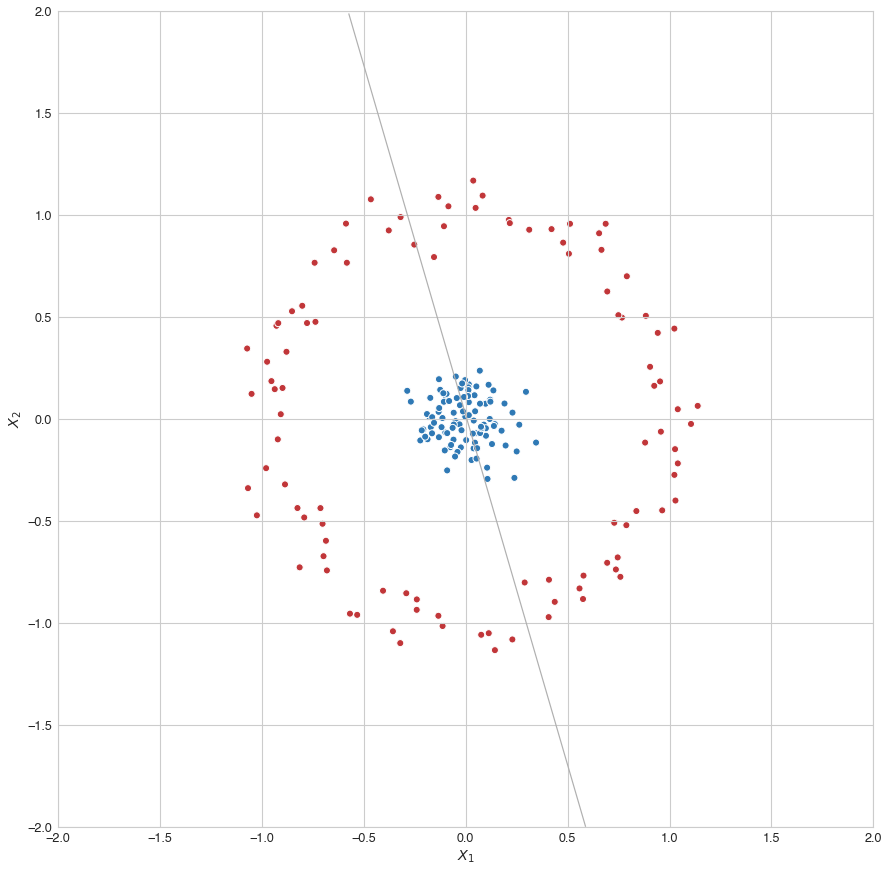

In [21]:
hide_code_in_slideshow()
f, ax = plt.subplots(figsize=(15, 15))
ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=1.2)

ax.scatter(X[:,0], X[:, 1], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-2, 2), ylim=(-2, 2),
       xlabel="$X_1$", ylabel="$X_2$")
print("Accuracy of the Logistic Regression: {}" .format(clf.score(X,y)))

In [22]:
import math
def toy_func(x):
    return (x >= -2) & (x <= 2)

def toy_predict(x,cutoff):
    return x >= cutoff
   
mu = 0
variance = 2
sigma = math.sqrt(variance)
xV = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
t_x = np.linspace(-4,4,20)
t_y = toy_func(t_x)

## Consider a Simple Example
- What if we only had 1 feature, and wanted to find a linear decision boundary for the following?
- Notice that no cutoff value will separate the 2 classes in the proper way. 

In [23]:
hide_code_in_slideshow()


def toy_cutoff(c_off):
    f , ax = plt.subplots(figsize=(8, 8))
    ax.scatter(t_x, np.zeros_like(t_x), c=t_y, cmap='spring')
    preds = toy_predict(t_x, c_off)
    toy_score = accuracy_score(y_true=t_y, y_pred=preds)
    ax.plot([c_off, c_off], [-.5,.5])
    print("Predictive Accuracy:{}".format(toy_score))
 

toy_c_off = interactive(toy_cutoff, c_off=(-4.0,4.0))
toy_c_off

interactive(children=(FloatSlider(value=0.0, description='c_off', max=4.0, min=-4.0), Output()), _dom_classes=…

In [24]:
from scipy.stats import norm
kernel_button = Button(description="Project Up" )

def kernel_callback(b):
    scatt.y=norm.pdf(t_x, mu, sigma)
kernel_button.on_click(kernel_callback)

orig_button = Button(description="Project Down" )
def orig_callback(b):
    scatt.y = np.zeros_like(t_x)
orig_button.on_click(orig_callback)
    

# Introduction Feature Maps 
- The problem: what if there is no linear separation in the data?
- One answer: find a higher dimensional space where they are linearly separable!
    - The linear decision boundary in the higher dimensional space corresponds to a non-linear decision boundary locally. 
- That is, $\forall x\in X$, compute $\phi(x)$ for $$\phi: \mathbb{R}^p \to \mathbb{R}^d$$
- Now, instead of building a model on $(x_i, y_i)$, we build it on $(\phi(x_i), y_i)$
- What should we choose for $\phi$?
    - Problem dependent
    - Common choices are 
        - polynomial feature maps (ie $x \mapsto g(x)$ for some polynomial function $g$) 
        - Gaussian Feature Transformation $\leftarrow$ a good choice for this problem
    

In [25]:
hide_code_in_slideshow()
xs = LinearScale()
ys = LinearScale()
c_map = {False:'magenta', True:"yellow"}
colors = [c_map[i] for i in t_y]
#t_x, np.zeros_like(t_x)
scatt = Scatter(x=t_x, y=np.zeros_like(t_x), scales={'x': xs, 'y': ys}, colors=colors)
xax = Axis(scale=xs, label='x', grid_lines='solid')
yax = Axis(scale=ys, orientation='vertical', tick_format='0.2f', label="ϕ(x)", grid_lines='solid')

fig = Figure(marks=[scatt], axes=[xax, yax], animation_duration=1000)
display(kernel_button, orig_button)
fig

Button(description='Project Up', style=ButtonStyle())

Button(description='Project Down', style=ButtonStyle())

Figure(animation_duration=1000, axes=[Axis(label='x', scale=LinearScale()), Axis(label='ϕ(x)', orientation='ve…

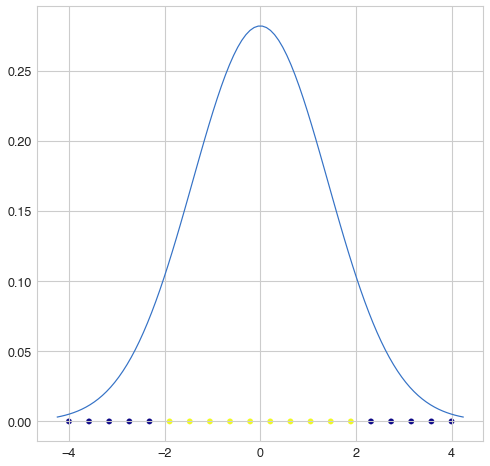

In [26]:
hide_code_in_slideshow()
plt.figure(figsize=(8,8))
plt.plot(xV,norm.pdf(xV, mu, sigma))
plt.scatter(t_x, np.zeros_like(t_x), c=t_y,cmap='plasma')



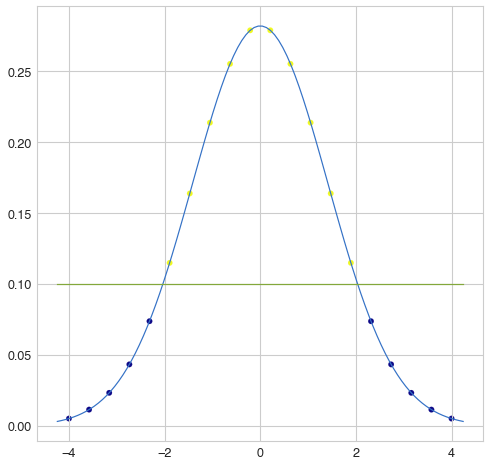

In [27]:
hide_code_in_slideshow()
plt.figure(figsize=(8,8))
plt.plot(xV,norm.pdf(xV, mu, sigma))
plt.scatter(t_x, norm.pdf(t_x, mu, sigma), c=t_y,cmap='plasma')
plt.plot(xV, np.zeros_like(xV)+.1 )

plt.show()

# What about in 2 dimensions? 
- How do we extend this idea to 2 dimensions, or even $p$ dimensions?
- Multivariate Gaussian

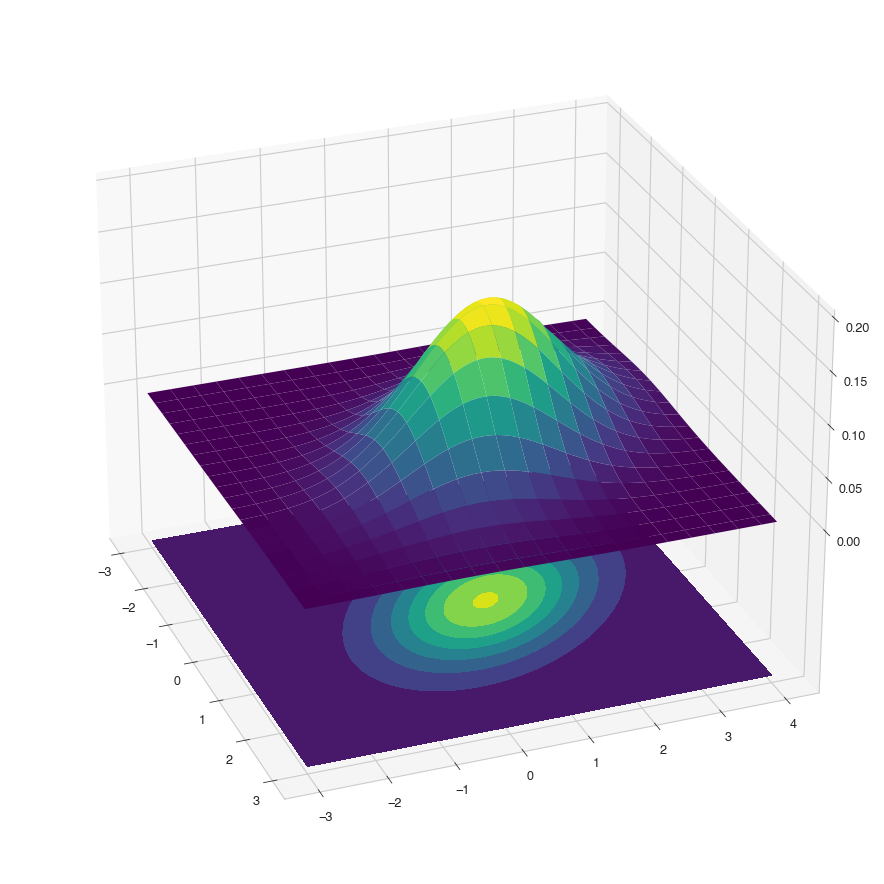

In [28]:
hide_code_in_slideshow()
gX, gY, gZ = Gaussian_plot()

In [29]:
hide_code_in_slideshow()
plot3D(gX,gY,gZ)

/usr/local/lib/python3.8/site-packages/IPython/core/display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [30]:
hide_code_in_slideshow()
proj_X, proj_y = make_circles(200, factor=.1, noise=.1)
p_r = np.exp(-(proj_X[:, 0] ** 2 + proj_X[:, 1] ** 2))
def plot_3D(elev=30, azim=30 ):
    plt.figure(figsize=(15,15))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(proj_X[:, 0], proj_X[:, 1], p_r, c=proj_y, s=50, cmap='spring')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interactive(plot_3D, elev=(-70, 90), azip=(-180, 180))

interactive(children=(IntSlider(value=30, description='elev', max=90, min=-70), IntSlider(value=30, descriptio…

In [31]:


from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import Scatter,Scatter3d, Figure, Layout
init_notebook_mode(connected=True)

spring_cmap = matplotlib.cm.get_cmap('spring')
def matplotlib_to_plotly(cmap, pl_entries):
    h = 1.0/(pl_entries-1)
    pl_colorscale = []

    for k in range(pl_entries):
        C = list(map(np.uint8, np.array(cmap(k*h)[:3])*255))
        pl_colorscale.append([k*h, 'rgb'+str((C[0], C[1], C[2]))])

    return pl_colorscale

spring_cmap = matplotlib_to_plotly(spring_cmap, 255)

In [32]:
hide_code_in_slideshow()
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))
X_trans = np.array([X[:, 0], X[:, 1], r]).T
clf = LogisticRegression().fit(X_trans, y)
xx, yy = np.mgrid[-2:2:.01, -2:2:.01]
grid = np.c_[xx.ravel(), yy.ravel()]

exp_grid = np.exp(-(grid[:, 0] ** 2 + grid[:, 1] ** 2)).reshape((grid.shape[0],1))
exp_grid.shape
exp_grid =  np.hstack( (grid,exp_grid ))
probs = clf.predict_proba(exp_grid)[:, 1].reshape(xx.shape)

[None, (-2.0, 2.0), (-2.0, 2.0), Text(0.5, 0, '$X_1$'), Text(0, 0.5, '$X_2$')]

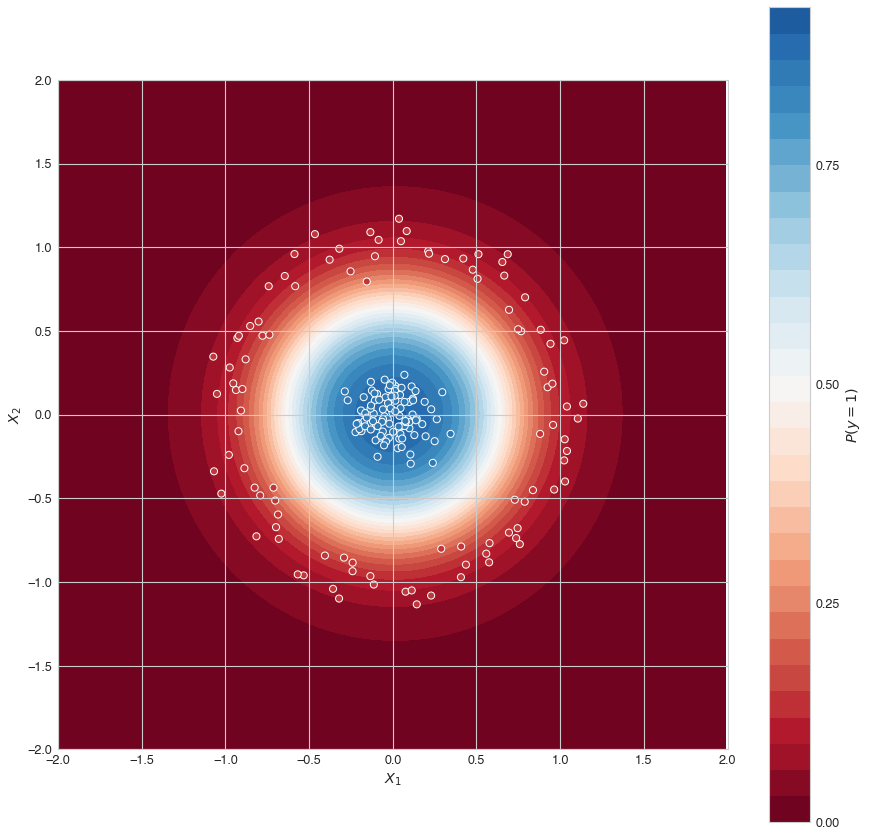

In [33]:
hide_code_in_slideshow()
f , ax = plt.subplots(figsize=(15, 15))

contour = ax.contourf(xx, yy, probs, 30, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,0], X[:, 1], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-2, 2), ylim=(-2, 2),
       xlabel="$X_1$", ylabel="$X_2$")

[None, (-2.0, 2.0), (-2.0, 2.0), Text(0.5, 0, '$X_1$'), Text(0, 0.5, '$X_2$')]

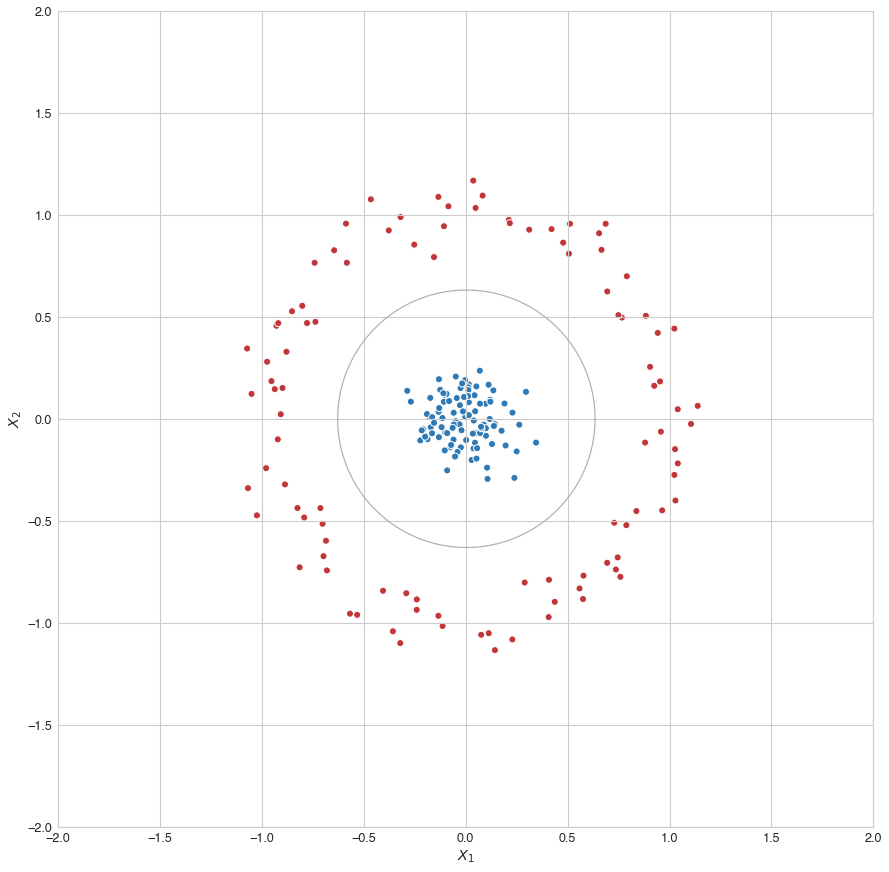

In [34]:
hide_code_in_slideshow()
f, ax = plt.subplots(figsize=(15, 15))
ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=1.2)

ax.scatter(X[:,0], X[:, 1], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-2, 2), ylim=(-2, 2),
       xlabel="$X_1$", ylabel="$X_2$")



In [35]:
p_X, p_y = load_planar_dataset()

## Harder Classification Problems
- Is this trick a panacea? Will it always work?
- If not, what made it work on the previous examples?



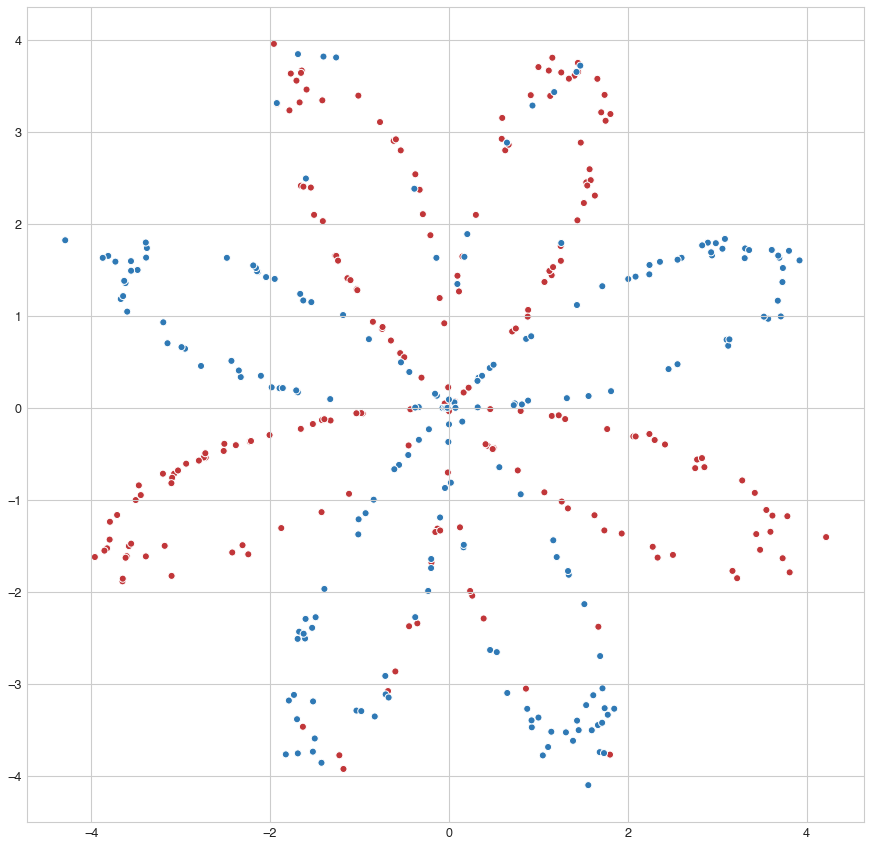

In [36]:
hide_code_in_slideshow()
f, ax = plt.subplots(figsize=(15, 15))
ax.scatter(p_X[:,0], p_X[:, 1], c=p_y.flatten(), s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)




/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



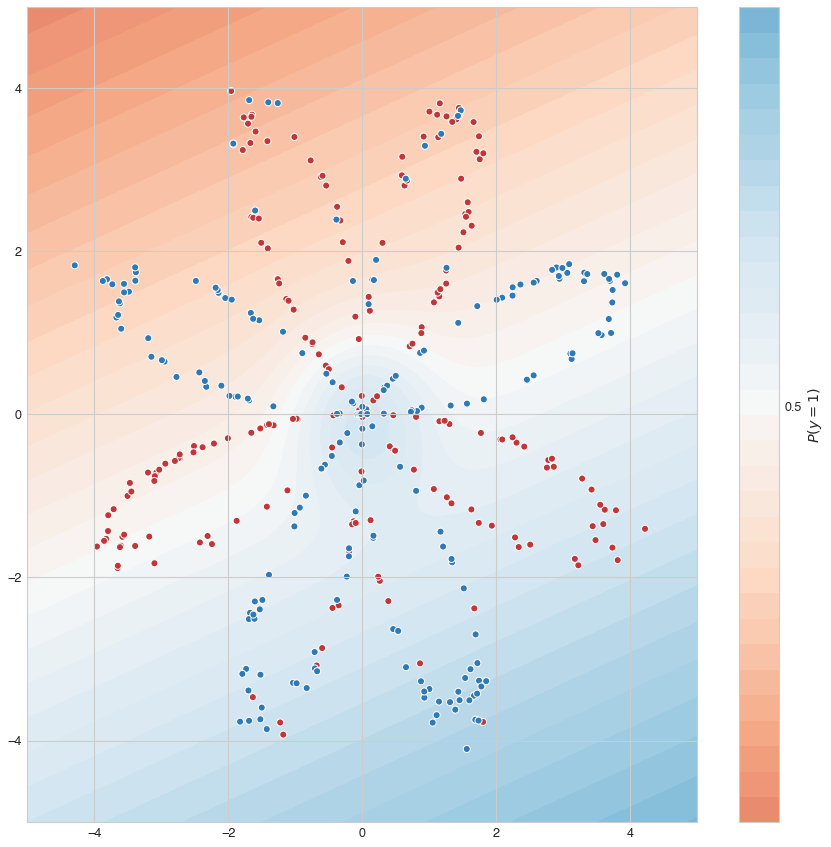

In [37]:
hide_code_in_slideshow()
r = np.exp(-(p_X[:, 0] ** 2 + p_X[:, 1] ** 2))

X_trans = np.array([p_X[:, 0], p_X[:, 1], r]).T
clf = LogisticRegression().fit(X_trans, p_y)
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]

exp_grid = np.exp(-(grid[:, 0] ** 2 + grid[:, 1] ** 2)).reshape((grid.shape[0],1))
exp_grid.shape
exp_grid =  np.hstack( (grid,exp_grid ))
probs = clf.predict_proba(exp_grid)[:, 1].reshape(xx.shape)

f , ax = plt.subplots(figsize=(15, 15))

contour = ax.contourf(xx, yy, probs, 30, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(p_X[:,0], p_X[:, 1], c=p_y.ravel(), s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)



## Polynomial Feature Transformation 
- We can also compute polynomial functions of the inputs
- ie, $$(x_1,x_2) \mapsto  x_1^2 + x_2^2 + x_1 x_2 + 1$$

In [38]:
def plot_poly_boundary(X, y, degree = 1):
    poly = PolynomialFeatures(degree=degree,interaction_only=False, include_bias=False).fit(X)
    X_tr = poly.transform(X)
    clf = LogisticRegression().fit(X_tr,y.ravel())
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    m = min(x_min, y_min) -.5
    M  = max(x_max, y_max) +.5
    
    xx, yy = np.mgrid[m:M:.1, m:M:.1]
    grid = np.c_[xx.ravel(), yy.ravel()]
    tr_grid = poly.transform(grid)
    probs = clf.predict_proba(tr_grid)[:, 1].reshape(xx.shape)
    f , ax = plt.subplots(figsize=(15, 15))
    contour = ax.contourf(xx, yy, probs, 30, cmap="RdBu",
                          vmin=0, vmax=1)
    ax.scatter(X[:,0], X[:, 1], c=y.ravel(), s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
    ax_c = f.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, .25, .5, .75, 1])




In [39]:
hide_code_in_slideshow()
poly_interact = interactive(plot_poly_boundary, deg=10, X=fixed(p_X), y=fixed(p_y))
poly_interact.children[0].max = 10
poly_interact.children[0].min = 1
poly_interact

interactive(children=(IntSlider(value=1, description='degree', max=10, min=1), Output()), _dom_classes=('widge…

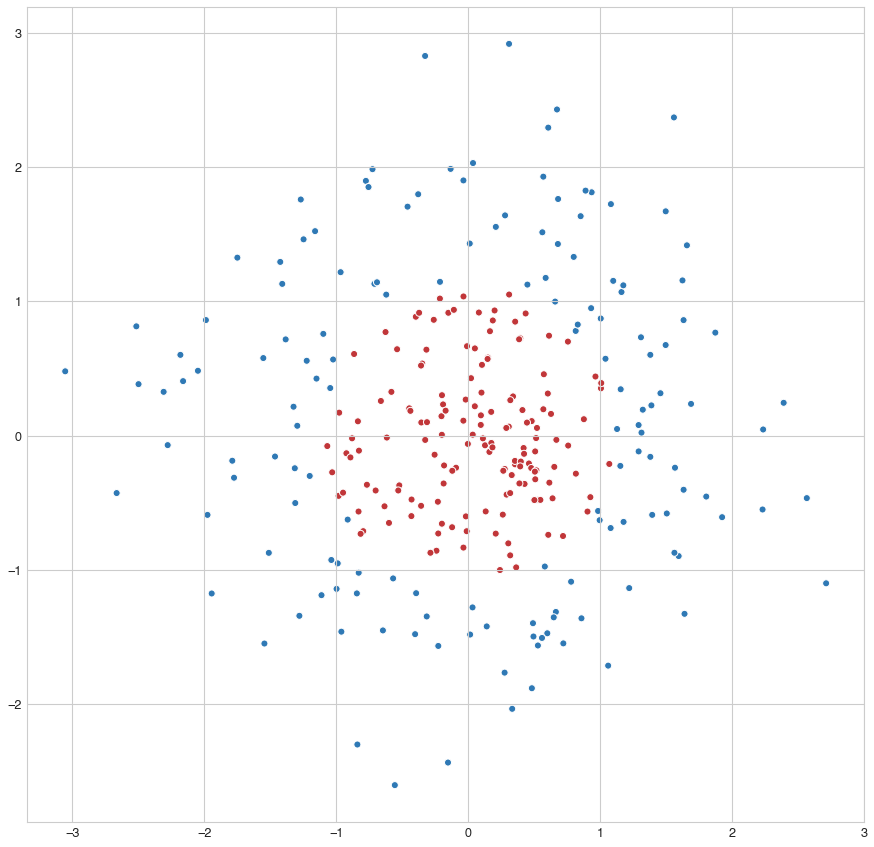

In [40]:
hide_code_in_slideshow()
gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=1, n_samples=300, n_features=2, n_classes=2, shuffle=True, random_state=None)
gauss_X , gauss_y = gaussian_quantiles[0], gaussian_quantiles[1]

f, ax = plt.subplots(figsize=(15, 15))
ax.scatter(gauss_X[:,0], gauss_X[:, 1], c=gauss_y.flatten(), s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

In [41]:
hide_code_in_slideshow()
poly_interact = interactive(plot_poly_boundary, deg=10, X=fixed(gauss_X), y=fixed(gauss_y))
poly_interact.children[0].max = 10
poly_interact.children[0].min = 1
poly_interact

interactive(children=(IntSlider(value=1, description='degree', max=10, min=1), Output()), _dom_classes=('widge…

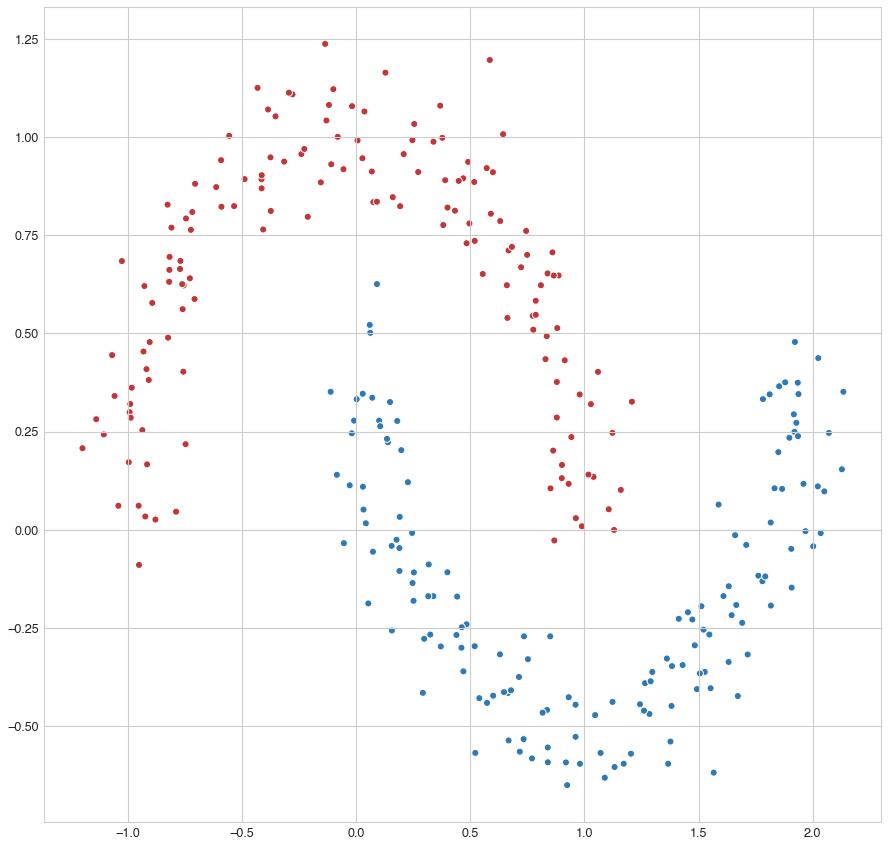

In [42]:
hide_code_in_slideshow()
noisy_moons = sklearn.datasets.make_moons(n_samples=300, noise=.1)
moon_X, moon_y = noisy_moons[0], noisy_moons[1]
f, ax = plt.subplots(figsize=(15, 15))
ax.scatter(moon_X[:,0], moon_X[:, 1], c=moon_y.flatten(), s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

In [43]:
hide_code_in_slideshow()
poly_interact = interactive(plot_poly_boundary, deg=10, X=fixed(moon_X), y=fixed(moon_y))
poly_interact.children[0].max = 10
poly_interact.children[0].min = 1
poly_interact

interactive(children=(IntSlider(value=1, description='degree', max=10, min=1), Output()), _dom_classes=('widge…

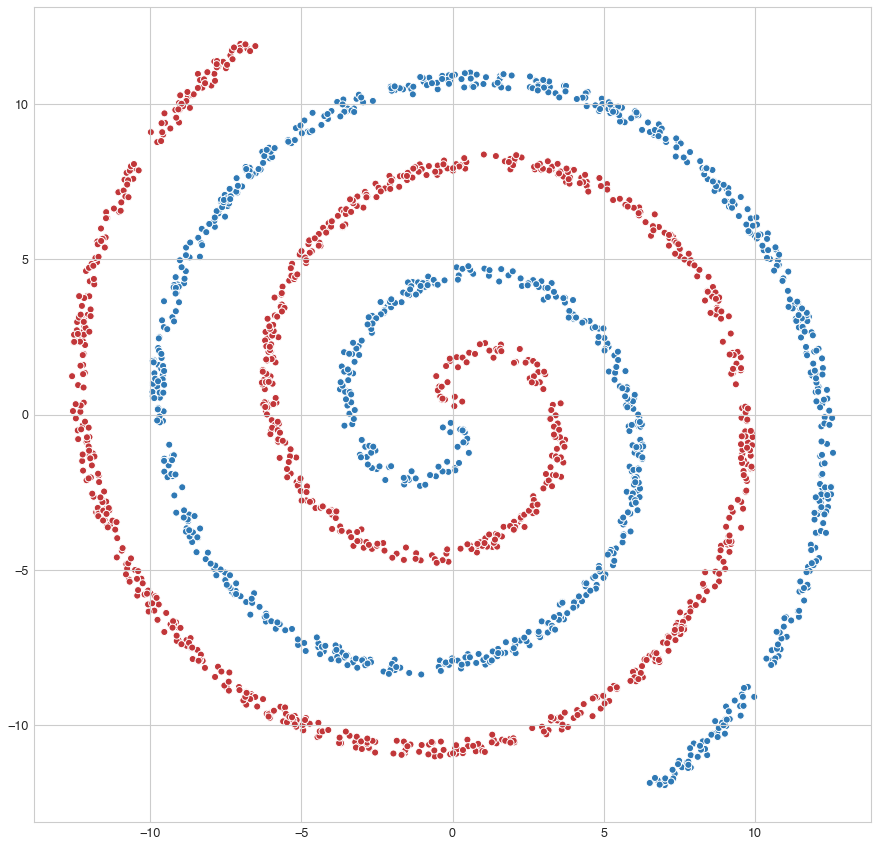

In [44]:
spiral_X, spiral_y = twospirals(1000)
hide_code_in_slideshow()
f, ax = plt.subplots(figsize=(15, 15))
ax.scatter(spiral_X[:,0], spiral_X[:, 1], c=spiral_y.flatten(), s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

In [45]:
hide_code_in_slideshow()
poly_interact = interactive(plot_poly_boundary, deg=10, X=fixed(spiral_X), y=fixed(spiral_y))
poly_interact.children[0].max = 10
poly_interact.children[0].min = 1
poly_interact

interactive(children=(IntSlider(value=1, description='degree', max=10, min=1), Output()), _dom_classes=('widge…

# Composing Logistic Regressions?
- Partial description of Multilayer Perceptron 

In [46]:
NeuralNet(num_inputs=3, num_hidden_layers=[5, 5, 5, 5], num_outputs=1)

NeuralNet(fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, layout=Layout(height='600px', width='…

In [47]:
hide_code_in_slideshow()
def mlp_plot(num_layers, layer_size):
    arch = [layer_size] * num_layers
    clf = MLPClassifier(activation='tanh', solver='adam', hidden_layer_sizes=arch,alpha=0 )
    clf.fit(spiral_X, spiral_y)

    x_min, x_max = spiral_X[:,0].min() - 1, spiral_X[:,0].max() + 1
    y_min, y_max = spiral_X[:,1].min() - 1, spiral_X[:,1].max() + 1
    m = min(x_min, y_min) -.25
    M  = max(x_max, y_max) + .25

    xx, yy = np.mgrid[m:M:.1, m:M:.1]
    grid = np.c_[xx.ravel(), yy.ravel()]



    probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)


    f , ax = plt.subplots(figsize=(15, 15))
    contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                          vmin=0, vmax=1)
    ax_c = f.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, .25, .5, .75, 1])


    ax.scatter(spiral_X[:,0], spiral_X[:, 1], c=spiral_y.flatten(), s=50,
               cmap="RdBu", vmin=-.2, vmax=1.2,
               edgecolor="white", linewidth=1)

mlp_interact = interactive(mlp_plot, num_layers=1,layer_size=1 )
mlp_interact.children[0].max = 10
poly_interact.children[0].min = 1
mlp_interact.children[1].max = 50
poly_interact.children[1].min = 1
display(mlp_interact)

interactive(children=(IntSlider(value=1, description='num_layers', max=10, min=-1), IntSlider(value=1, descrip…


# Real World Example: 
- The question then becomes when, if ever, do we get a situation in which statistical decision problems can be informed by questions of geometric separability?
- In general, this is hard to quantify, but there appear to be many datasets that have this property-- but this discussion is beyond the scope of this lecture
- Lets consider one such data set
## Wisconsin Breast Cancer Dataset
- Classification Task: Predict weather or not a tumor is benign (0) or Malignant (1)



In [48]:
data = load_breast_cancer()
features = list(data['feature_names'])
target = data['target'].reshape( (len(data['target']),1))
names = features + ['target']
XY= np.hstack((data['data'], target) )
df = pd.DataFrame(data=XY, columns=names)
# make 1 malignant and 0 benign
df.target = ((df.target - 1) * -1).astype(int)


In [49]:
print(df.shape)
df.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [ ]:
clf = LogisticRegression(max_iter = 1000, penalty="none",n_jobs=-1)
wbc_X = df[features].values
clf.fit(wbc_X, df.target)
clf.score(wbc_X, df.target)

# Further Work: What is missing?
## Modeling Concerns

- "All models are wrong, some are useful" [George Box]
- The human element 
    - Implications of false positives and false negatives
- Feature Selection
    - Are all features important?
- Partitioning data
    - Practice test and Midterm analogy 
- Model Selection and Cross Validation
    - Evaluating Models
- Regularization
    - Bias, variance, and conservative estimates
- A lot more...




# Overfitting 
- If you train your model on examples that it already has seen the answer to, this will give you an overly optimistic estimate of the error 
- It is essentially cheating
    - Note only using a testing set is typically not enough to prevent overfitting in general. Typically, models use regularization as well. 
<img src="https://media.giphy.com/media/ehgxL0CGDqOtO8MYjv/giphy.gif">

# What happens if you cheat on all of your tests?
- You fail in real life.
<img src="https://media.giphy.com/media/N8wR1WZobKXaE/giphy.gif">



# Ensuring Generality of a Model
## Steps you can take...
- Build your model with  Training Set
- Score your model on the Testing set which is composed of examples the model has yet to see. 
- Selection by cross validation
    - Regularization, (using a validation set to select hyperparameters)

In [ ]:
X_trainwbc, X_testwbc, y_trainwbc, y_testwbc = train_test_split(wbc_X, df.target,test_size=0.33, random_state=42)

In [ ]:
clf = LogisticRegression(max_iter = 1000, penalty="none",n_jobs=-1)
wbc_X = df[features].values
clf.fit(X_trainwbc, y_trainwbc)
clf.score( X_testwbc,y_testwbc)